In [1]:
from sklearn import tree
from dtreeviz.trees import *
from dtreeviz.colors import *
from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


# Cars

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_cars = pd.read_csv("data/cars.csv")
X = df_cars[['WGT']]
y = df_cars['MPG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

from matplotlib import rcParams

rcParams['font.family'] = 'Arial'
plt.scatter(X,y,marker='o', alpha=.4, c='#4575b4',
                edgecolor='grey', lw=.3)

plt.xlabel("Vehicle Weight", fontsize=14)
plt.ylabel("MPG", fontsize=14)
plt.tight_layout()
plt.savefig("/tmp/cars-wgt-vs-mpg.svg", bbox_inches=0, pad_inches=0)

FileNotFoundError: [Errno 2] No such file or directory: 'data/cars.csv'

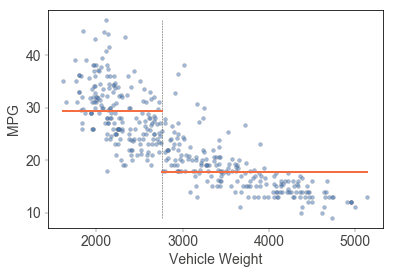

In [ ]:
X = df_cars.drop('MPG', axis=1)
y = df_cars['MPG']

fig = plt.figure()
ax = fig.gca()

max_depth = 1
rtreeviz_univar(ax,
                    X.WGT, y,
                     max_depth=max_depth,
                     feature_name='Vehicle Weight',
                     target_name='MPG',
                     fontsize=14,
                   show={'splits'})
plt.savefig(f"/tmp/cars-dectree-depth-{max_depth}.svg", bbox_inches=0, pad_inches=0)

In [ ]:
def get_splits(x_train,y_train,max_depth):
    t = tree.DecisionTreeRegressor(max_depth=max_depth)
    t.fit(x_train.reshape(-1,1), y_train)

    shadow_tree = ShadowDecTree(t, x_train.reshape(-1,1), y_train, feature_names=['foo'])
    splits = []
    for node in shadow_tree.internal:
        splits.append(node.split())
    preds = []
    for node in shadow_tree.leaves:
        preds.append(node.prediction())
    return splits, preds

splits, preds = get_splits(X.WGT.values, y, 1)
print(splits, '\n', preds)
splits, preds = get_splits(X.WGT.values, y, 2)
print(splits, '\n', preds)

[2764.5] 
 [29.41989521989529, 17.769154278606962]
[2217.0, 3657.5, 2764.5] 
 [32.61382956382979, 26.32474235051546, 20.485185268518514, 14.61505377419355]


## Animate cars

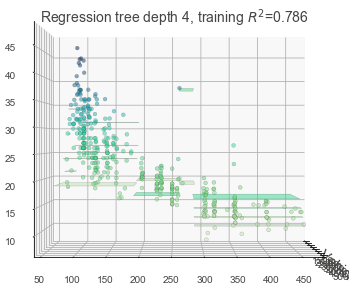

In [ ]:
df_cars = pd.read_csv("data/cars.csv")
X = df_cars.drop('MPG', axis=1)
y = df_cars['MPG']

max_depth = 4
features=[2,1]
X = X.values[:, features]
figsize = (6,5)
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111, projection='3d')
rtreeviz_bivar_3D(ax,
                      X, y,
                      max_depth=max_depth,
                      feature_names=['Vehicle Weight', 'Horse Power'],
                      target_name='MPG',
                      fontsize=14)
plt.savefig(f"/tmp/rtree-depth-{max_depth}.svg", bbox_inches=0, pad_inches=0)
plt.show()

In [ ]:
max_depth = 2
X = df_cars.drop('MPG', axis=1)
y = df_cars['MPG']

x_train = X.values[:,2]
y_train = y
feature_names = ['Vehicle Weight']
t = tree.DecisionTreeRegressor(max_depth=max_depth)
t.fit(x_train.reshape(-1,1), y_train)
viz = dtreeviz(t, x_train.reshape(-1,1), y_train, target_name='MPG',
              feature_names=feature_names)
filename = f"/tmp/cars-wgt-depth-{max_depth}.svg"
plt.tight_layout()
viz.save(filename)

<Figure size 432x288 with 0 Axes>

# Wine

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


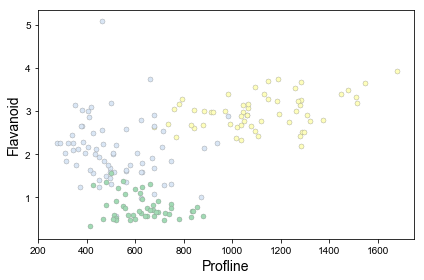

In [ ]:
from sklearn.datasets import load_wine

fig = plt.figure()
ax = fig.gca()

wine = load_wine()

class_values = [0,1,2]

print(wine.feature_names)
X = wine.data[:,[12,6]]
y = wine.target
X_hist = [X[y == cl] for cl in class_values]

color_values = color_blind_friendly_colors[3]
colors = {v: color_values[i] for i, v in enumerate(class_values)}

for i, h in enumerate(X_hist):
    ax.scatter(h[:,0], h[:,1], alpha=1, marker='o', s=25, c=colors[i],
               edgecolors='grey', lw=.3)

#plt.scatter(X,y,marker='o', alpha=.4, c='#4575b4', edgecolor=GREY, lw=.3)

plt.xlabel("Profline", fontsize=14)
plt.ylabel("Flavanoid", fontsize=14)
plt.tight_layout()
plt.savefig("/tmp/wine-prol-flav.svg", bbox_inches=0, pad_inches=0)

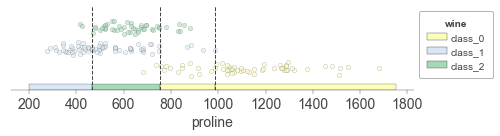

In [ ]:
from dtreeviz.trees import *

max_depth = 2

features = [12]
feature_names=['proline']
figsize = (6, 2)
fig, ax = plt.subplots(1, 1, figsize=figsize)

x_train = wine.data[:, features[0]]
y_train = wine.target
ctreeviz_univar(ax, x_train, y_train, max_depth=max_depth, feature_name=feature_names[0],
                class_names=list(wine.target_names), gtype='strip', target_name='wine',
               show={'splits','legend'})
filename = f"/tmp/wine-{feature_names[0]}-featspace-depth-{max_depth}.svg"
plt.tight_layout()
plt.savefig(filename, bbox_inches=0, pad_inches=0)

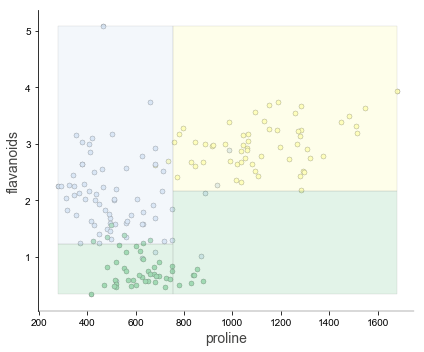

In [ ]:
max_depth = 2

features = [12,6]
feature_names=['proline','flavanoids']

figsize = (6, 5)
fig, ax = plt.subplots(1, 1, figsize=figsize)

X_train = wine.data
X_train = X_train[:, features]
y_train = wine.target
ctreeviz_bivar(ax, X_train, y_train, max_depth=max_depth, feature_names=feature_names,
                class_names=list(wine.target_names), target_name='wine',
               show={'splits'})
filename = f"/tmp/wine-{','.join(feature_names)}-featspace-depth-{max_depth}.svg"
plt.tight_layout()
plt.savefig(filename, bbox_inches=0, pad_inches=0)

In [ ]:
features = [12,6]
feature_names=['proline','flavanoids']

max_depth = 2
clf = tree.DecisionTreeClassifier(max_depth=max_depth)
wine = load_wine()

X_train = wine.data[:, features]
y_train = wine.target

clf.fit(X_train, y_train)

viz = dtreeviz(clf, X_train, y_train, target_name='wine',
              feature_names=feature_names,
              class_names=list(wine.target_names),
              histtype='strip')
filename = f"/tmp/wine-{','.join(feature_names)}-depth-{max_depth}.svg"
plt.tight_layout()
viz.save(filename)


<Figure size 432x288 with 0 Axes>

## sklearn version

### wine

In [ ]:
from sklearn.tree import export_graphviz

wine = load_wine()

X_train = wine.data[:, features]
y_train = wine.target

max_depth = 2
clf = tree.DecisionTreeClassifier(max_depth=max_depth)
clf.fit(X_train, y_train)

dot = export_graphviz(clf, out_file=None,
                        filled=True, rounded=True,
                        feature_names=feature_names,
                        class_names=list(wine.target_names),
                        special_characters=True)
viz = graphviz.Source(dot)
viz.render(f"/tmp/wine-sklearn-depth-{max_depth}")

'/tmp/wine-sklearn-depth-2.pdf'

### cars

In [ ]:
X = df_cars.drop('MPG', axis=1)
y = df_cars['MPG']

features=[2]
feature_names=['Vehicle Weight']
target_name='MPG'

X_train = X.values[:, 2]
y_train = y

max_depth = 2
regr = tree.DecisionTreeRegressor(max_depth=max_depth)
regr.fit(X_train.reshape(-1,1), y_train)

dot = export_graphviz(regr, out_file=None,
                        filled=True, rounded=True,
                        feature_names=feature_names,
                        special_characters=True)
viz = graphviz.Source(dot)
viz.render(f"/tmp/cars-sklearn-depth-{max_depth}")

'/tmp/cars-sklearn-depth-2.pdf'